# 시계열 데이터
## 1. Numpy의 polyfit으로 회귀(regression) 분석하기
* 1. 야후 파이낸스 데이터를 가져오기 위한 yfinance
    * pip install yfinance
* 2. 예측 모델링 및 시각화를 위한 prophet
    * pip install prophet
* 3. Prophets는 Plotly 기반으로 데이터를 시각화하므로
    * pip install plotly

## Prophet 참고 자료
* https://zzsza.github.io/data/2019/02/06/prophet/
* https://gorakgarak.tistory.com/1255
* https://facebook.github.io/prophet/

# 시계열(Time Series) 분석
1. (time series) 시계열 자료
    년도별 계절별 월별 일별 시 분 초별로 시간의 흐름에 따라 관측된 자료
2. 시계열자료의 여러 형태
    시계열그림(time series plot)
    시간의 경과에 따라 시계열자료의 값이 변하는 것을 그린 그림
3. 시계열자료의 분석 목적:
    1) (forecast) 미래에 대한 예측
    2) 시스템 또는 확률과정의 이해와 제어(control)
ARIMA와 같은 확률론적이고 이론적인 모형이 아니라 몇가지
경험적 규칙(heuristic rule)을 사용하는 단순 회귀모형이지만
단기적 예측에서는 큰 문제 없이 사용할 수 있다.

-Prophet
Facebook 에서 발표한 시계열 데이터 기반의 예측 라이브러리.
파이썬과 R에서 사용할 수 있습니다.
통계적 지식이 없어도 파라미터를 통해 모형을 조정할 수 있고,
일반적인 경우 기본값만 사용해도 높은 성능을 보여줌 내부가 어떻게 동작하는지 고민할 필요가 없음

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
import platform
path = 'C:\Windows\Fonts\malgun.ttf'

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...')

In [3]:
pweb = pd.read_csv('../data/python_data/08. PinkWink Web Traffic.csv', 
                  encoding = 'utf-8', thousands = ',',      # thousands: 천단위 숫자에서 컴마
                  names = ['date', 'hit'], index_col = 0)
pweb = pweb[pweb['hit'].notnull()]
print(pweb.head())
print(pweb.tail())
# 홈페이지 방문객 숫자(날짜, 방문객 수)
# 16 . 7. 1 ~ 17. 6. 30  , 1년간 방문객의 수

             hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0
               hit
date              
17. 6. 26.  1309.0
17. 6. 27.  1436.0
17. 6. 28.  1387.0
17. 6. 29.  1328.0
17. 6. 30.  1193.0


<Axes: xlabel='date'>

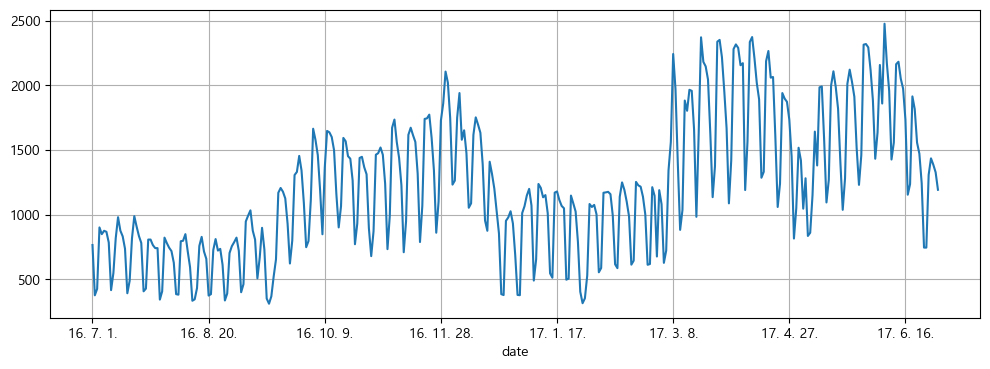

In [4]:
pweb['hit'].plot(figsize = (12,4), grid = True)

In [5]:
time = np.arange(0,len(pweb))    #시간(time) 축 생성(0~364)
traffic = pweb['hit'].values   # 웹 트래픽 traffic 변수에 저장
fx = np.linspace(0, time[-1], 1000)
print(fx)

[  0.           0.36436436   0.72872873   1.09309309   1.45745746
   1.82182182   2.18618619   2.55055055   2.91491491   3.27927928
   3.64364364   4.00800801   4.37237237   4.73673674   5.1011011
   5.46546547   5.82982983   6.19419419   6.55855856   6.92292292
   7.28728729   7.65165165   8.01601602   8.38038038   8.74474474
   9.10910911   9.47347347   9.83783784  10.2022022   10.56656657
  10.93093093  11.2952953   11.65965966  12.02402402  12.38838839
  12.75275275  13.11711712  13.48148148  13.84584585  14.21021021
  14.57457457  14.93893894  15.3033033   15.66766767  16.03203203
  16.3963964   16.76076076  17.12512513  17.48948949  17.85385385
  18.21821822  18.58258258  18.94694695  19.31131131  19.67567568
  20.04004004  20.4044044   20.76876877  21.13313313  21.4974975
  21.86186186  22.22622623  22.59059059  22.95495495  23.31931932
  23.68368368  24.04804805  24.41241241  24.77677678  25.14114114
  25.50550551  25.86986987  26.23423423  26.5985986   26.96296296
  27.3273273

In [6]:
# 평균제곱오차(mean squared error, mse)
# 오차 = (예측값 - 실제값)**2       # 음수값이 나오는걸 막기위해 제곱을 함
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y)**2))

In [7]:
#polyfit(x, y, n)
fp1 = np.polyfit(time, traffic, 1)  # 다항식의 입력값 x, y, 1차
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)  # 다항식의 입력값 x, y, 2차
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)  # 다항식의 입력값 x, y, 3차
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)  # 다항식의 입력값 x, y, 15차
f15 = np.poly1d(fp15)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


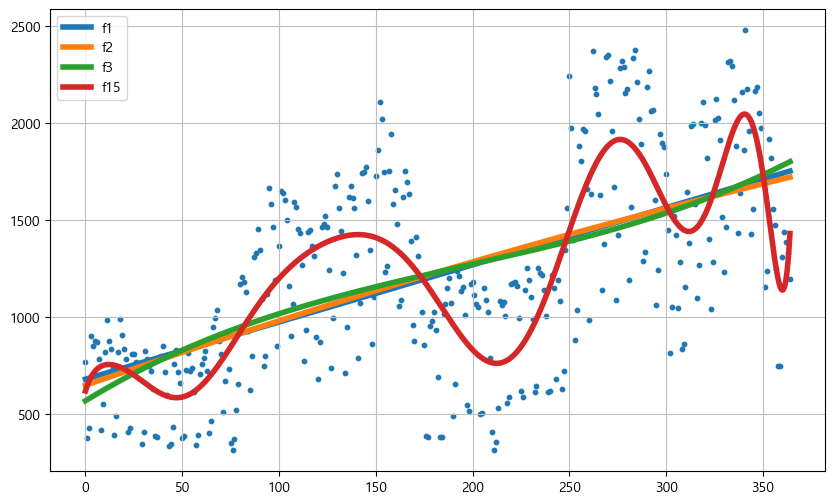

In [8]:
plt.figure(figsize = (10,6))
plt.scatter(time, traffic, s = 10)

plt.plot(fx, f1(fx), lw = 4, label = 'f1')
plt.plot(fx, f2(fx), lw = 4, label = 'f2')
plt.plot(fx, f3(fx), lw = 4, label = 'f3')
plt.plot(fx, f15(fx), lw = 4, label = 'f15')       #과대적합(과적합)

plt.grid(True, linestyle = '-', color = '0.75')

plt.legend(loc = 2)
plt.show()

# 2. Prophet 모듈을 이용한 forecast 예측

In [9]:
df = pd.DataFrame({'ds': pweb.index, 'y': pweb['hit']})
df.reset_index(inplace = True )
df['ds'] = pd.to_datetime(df['ds'], format = '%y. %m. %d.')      #yyyy-mm-dd 형태로 
df.head()

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [10]:
del df['date']     # df['ds'] 생성했으므로 삭제
# Prophet() 함수를 사용시
# 주기성이 연단위(yearly_seasonality) 및 일단위(daily_seasonality = True)로 있다고 알려줌
# Prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit 메서드를 호출한다.
m = Prophet(yearly_seasonality = True, daily_seasonality = True)       # m은 연과 일단위로 주기성이 있다는 의미
m.fit(df)

12:06:55 - cmdstanpy - INFO - Chain [1] start processing
12:06:56 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# make_future_dataframe: 예측 날짜 구간 생성()
# 16.7.1.~ 17.6.30.  홈페이지 방문자 수 (original data)
future = m.make_future_dataframe(periods = 60)    # 1년간의 original data를 기반으로 향후 60일의 미래를 예측
print(future.head())
print(future.tail())

          ds
0 2016-07-01
1 2016-07-02
2 2016-07-03
3 2016-07-04
4 2016-07-05
            ds
420 2017-08-25
421 2017-08-26
422 2017-08-27
423 2017-08-28
424 2017-08-29


In [12]:
#predict: 신뢰구간을 포함한 예측 실행
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()    # yhat 중간값, yhat_lower는 하한값, yhat_upper는 상한값

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,901.398379,688.782190,1108.017131
421,2017-08-26,486.266408,276.675861,712.676337
422,2017-08-27,618.928059,407.102284,833.901679
423,2017-08-28,1171.734066,943.739472,1378.474303
424,2017-08-29,1207.743873,1013.474347,1418.947279


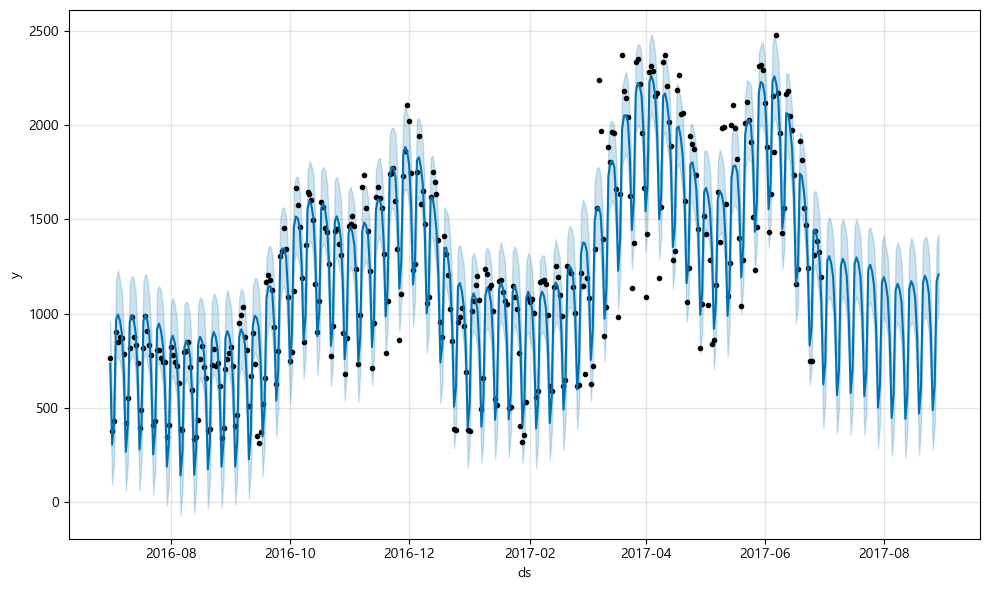

In [14]:
#plot: 원래의 시계열 데이터와 예측 데이터
# 2017년 6월 말까지의 데이터로 약 2개월(60일)을 예측함
m.plot(forecast);     # ; 를 하면 그래프가2개 나타나는걸 막을수있음. 1개나타나도록

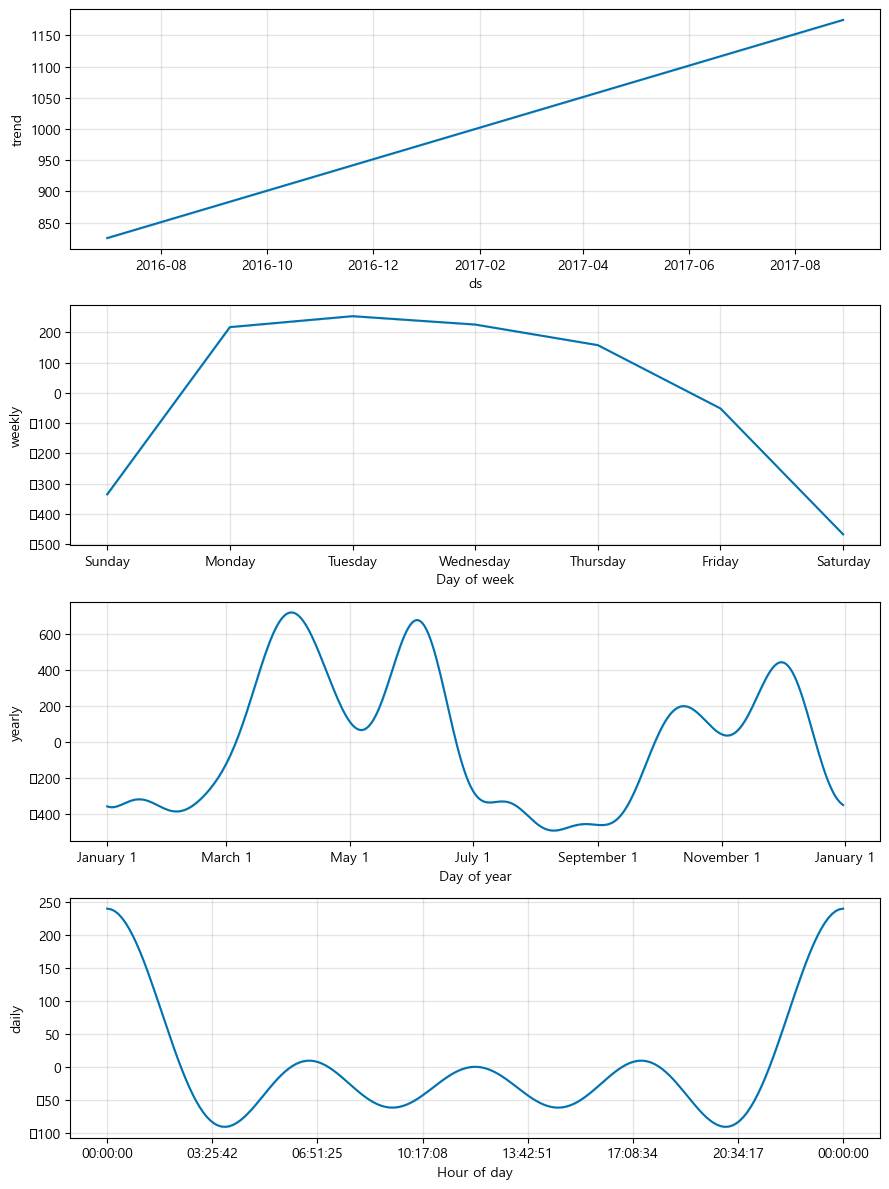

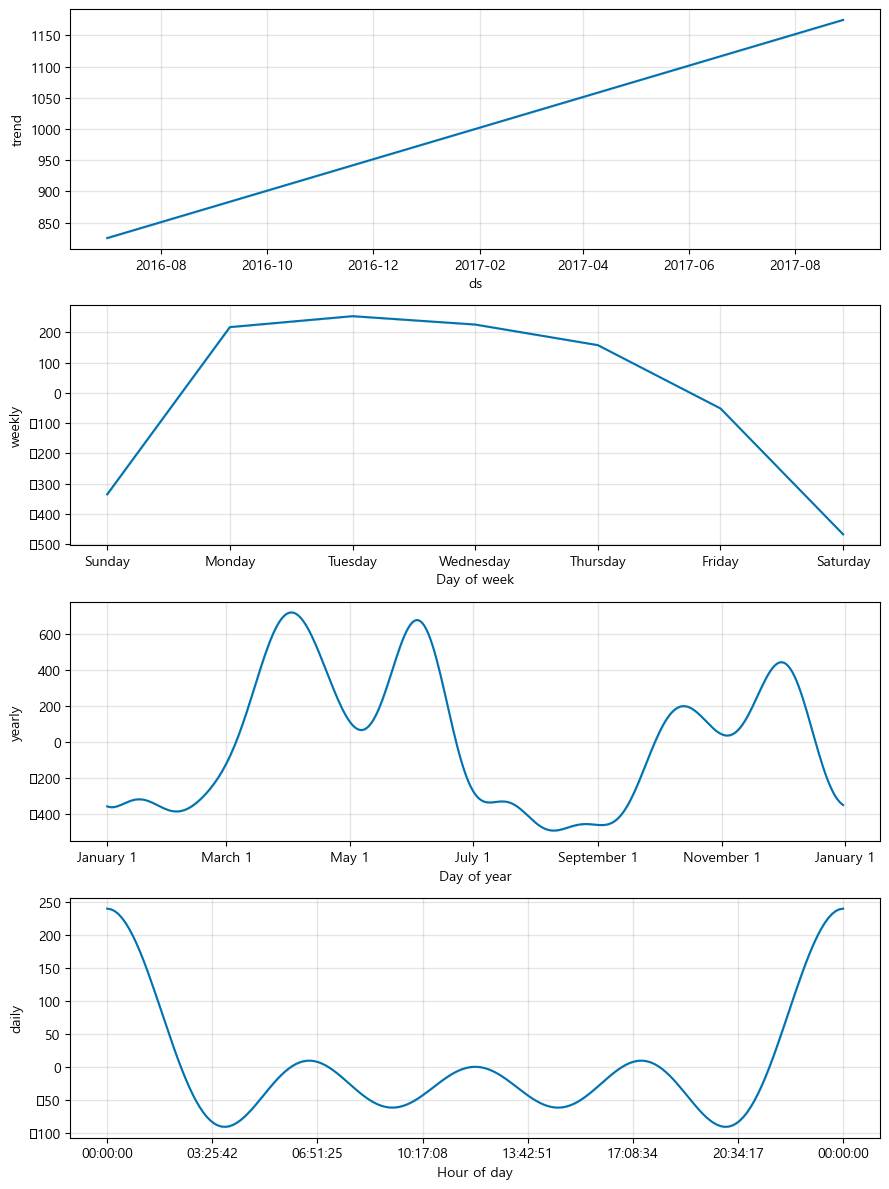

In [30]:
#plt_components: 선형회귀 및 계절성 성분별로 분리
m.plot_components(forecast)

# 3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [15]:
# https://finance.yahoo.com/
import datetime as dt
import yfinance as yf
company = 'TATAELXSI.NS'
# Define a start date and End Date
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2023, 5, 1)
#Read Stock Price Data
data = yf.download(company, start, end)
data.tail(10)
# open 시가, high 고가, low 저가, close 종가, Adj close 조정 종가, column 거래량

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-17,6237.950195,6300.0,6180.000000,6289.750000,6240.825195,108512
2023-04-18,6298.750000,6396.0,6295.000000,6367.299805,6317.771973,100611
2023-04-19,6368.000000,6375.0,6290.049805,6307.200195,6258.139648,69527
2023-04-20,6316.000000,6364.5,6235.350098,6251.649902,6203.021484,90809
2023-04-21,6269.000000,6300.0,6205.549805,6281.000000,6232.143555,66308
2023-04-24,6280.850098,6330.0,6220.049805,6252.950195,6204.312012,61632
2023-04-25,6253.000000,6307.0,6235.299805,6271.200195,6222.419922,47904
2023-04-26,6269.000000,6300.0,6240.000000,6290.850098,6241.916992,56123
2023-04-27,6284.000000,6635.0,6265.149902,6578.200195,6527.031738,493002


In [16]:
start = '2012-7-1'
end = '2022-7-31'
df = yf.download('000270.KS', start, end)  #기아
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,75600.0,75900.0,75000.0,75300.0,57019.425781,950363
2012-07-03,75800.0,75800.0,73100.0,73500.0,55656.414062,2542262
2012-07-04,74300.0,74500.0,73600.0,74500.0,56413.648438,1786898
2012-07-05,74600.0,74800.0,73800.0,74100.0,56110.746094,835637
2012-07-06,74400.0,74500.0,73500.0,73700.0,55807.863281,758448


In [17]:
start_date = '2012-1-1'
end_date = '2022-3-26'
KAKAO = yf.download('035720.KS',start_date, end_date)   #카카오
KAKAO.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,24377.958984,25083.107422,24176.488281,24921.929688,24042.845703,473517
2012-01-03,24982.371094,25647.224609,24821.195312,25606.929688,24703.681641,520254
2012-01-04,25606.929688,25606.929688,25022.666016,25083.107422,24198.335938,464002
2012-01-05,25365.166016,25848.695312,25143.548828,25304.724609,24412.136719,377598
2012-01-06,25385.312500,25667.371094,24579.429688,24579.429688,23712.425781,228291
2012-01-09,24579.429688,25365.166016,24257.076172,25224.136719,24334.390625,415385
2012-01-10,25486.048828,26473.253906,25486.048828,26473.253906,25539.445312,776777
2012-01-11,26453.107422,26936.636719,25909.136719,26594.136719,25656.068359,417023
2012-01-12,26412.814453,26453.107422,26050.166016,26090.460938,25170.156250,340213


In [18]:
start_date = '2012-7-1'
end_date = '2023-6-30'
SAMSUNG = yf.download('005930.KS',start_date, end_date)   #삼성전자
SAMSUNG.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,24160.0,24180.0,23420.0,23480.0,18562.671875,19106750
2012-07-03,23640.0,23860.0,23400.0,23500.0,18578.478516,15801550
2012-07-04,23640.0,23940.0,23560.0,23820.0,18831.462891,19158750
2012-07-05,23740.0,23880.0,23540.0,23700.0,18736.591797,9068550
2012-07-06,23880.0,23880.0,23060.0,23220.0,18357.115234,21158900


<Axes: xlabel='Date'>

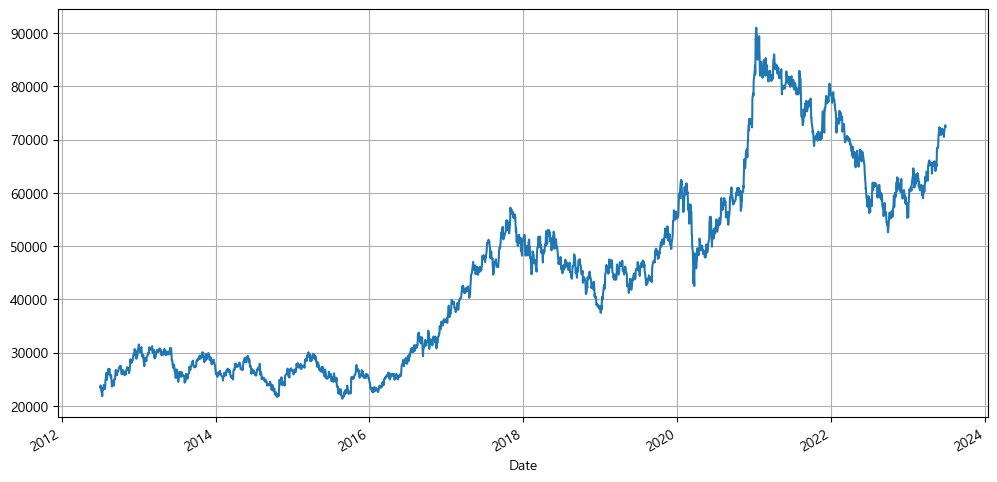

In [19]:
SAMSUNG['Close'].plot(figsize = (12,6),grid = True)

In [20]:
#start = '2012-7-1'
#end = '2022-6-30'
SAM_trunc = SAMSUNG[:'2022-12-31']   #' 2012-7-1' ~ '2022-12-31'
SAM_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,24160.0,24180.0,23420.0,23480.0,18562.671875,19106750
2012-07-03,23640.0,23860.0,23400.0,23500.0,18578.478516,15801550
2012-07-04,23640.0,23940.0,23560.0,23820.0,18831.462891,19158750
2012-07-05,23740.0,23880.0,23540.0,23700.0,18736.591797,9068550
2012-07-06,23880.0,23880.0,23060.0,23220.0,18357.115234,21158900
...,...,...,...,...,...,...
2022-12-23,58200.0,58400.0,57700.0,58100.0,57406.562500,9829407
2022-12-26,58000.0,58100.0,57700.0,57900.0,57208.949219,6756411
2022-12-27,58000.0,58400.0,57900.0,58100.0,57406.562500,10667027


In [21]:
df = pd.DataFrame({'ds': SAM_trunc.index, 'y': SAM_trunc['Close']})
print(df)
df.reset_index(inplace = True)
del df['Date']
df.head()

                   ds        y
Date                          
2012-07-02 2012-07-02  23480.0
2012-07-03 2012-07-03  23500.0
2012-07-04 2012-07-04  23820.0
2012-07-05 2012-07-05  23700.0
2012-07-06 2012-07-06  23220.0
...               ...      ...
2022-12-23 2022-12-23  58100.0
2022-12-26 2022-12-26  57900.0
2022-12-27 2022-12-27  58100.0
2022-12-28 2022-12-28  56600.0
2022-12-29 2022-12-29  55300.0

[2583 rows x 2 columns]


,ds,y
0,2012-07-02,23480.0
1,2012-07-03,23500.0
2,2012-07-04,23820.0
3,2012-07-05,23700.0
4,2012-07-06,23220.0


In [22]:
#주기성이 일단위로 있다고 알려줌
m = Prophet(daily_seasonality = True)
m.fit(df)

12:12:39 - cmdstanpy - INFO - Chain [1] start processing
12:12:42 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# 1년(365일) 후 예측
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
2943,2023-12-25
2944,2023-12-26
2945,2023-12-27
2946,2023-12-28
2947,2023-12-29


In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
2943,2023-12-25,52119.516252,38253.268386,65048.125451
2944,2023-12-26,52254.569225,38720.413126,64249.193454
2945,2023-12-27,52234.042089,37230.405663,64260.012439
2946,2023-12-28,52353.470209,38862.377258,64137.008034
2947,2023-12-29,52366.803001,38156.609886,64485.671653


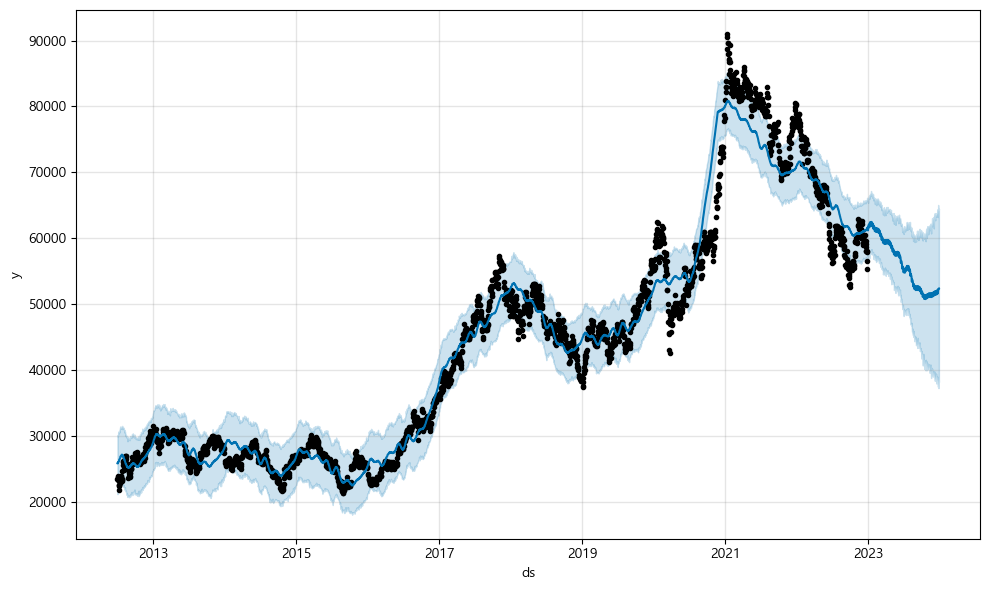

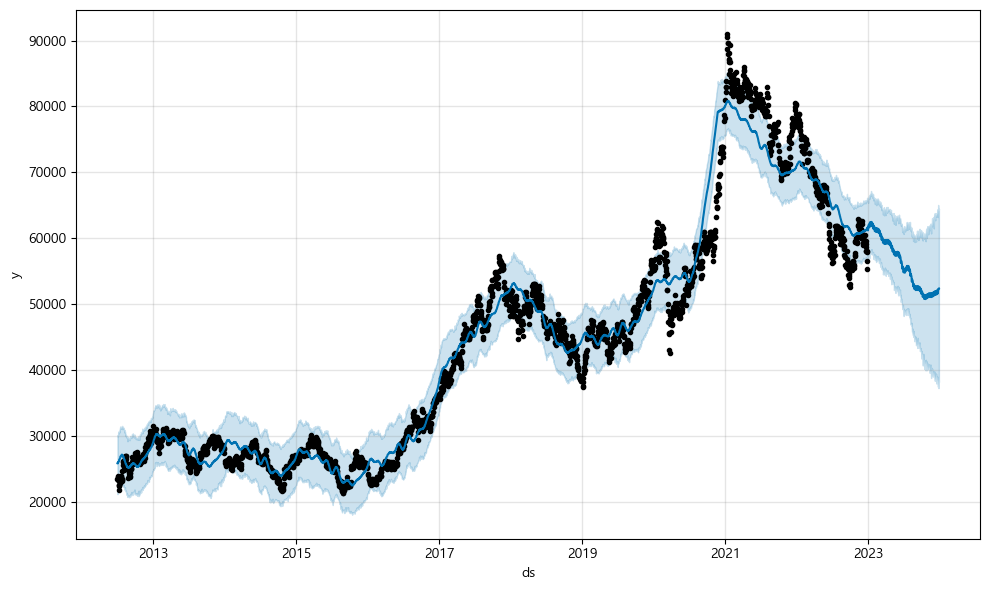

In [25]:
m.plot(forecast)    #까만점은 실제데이터

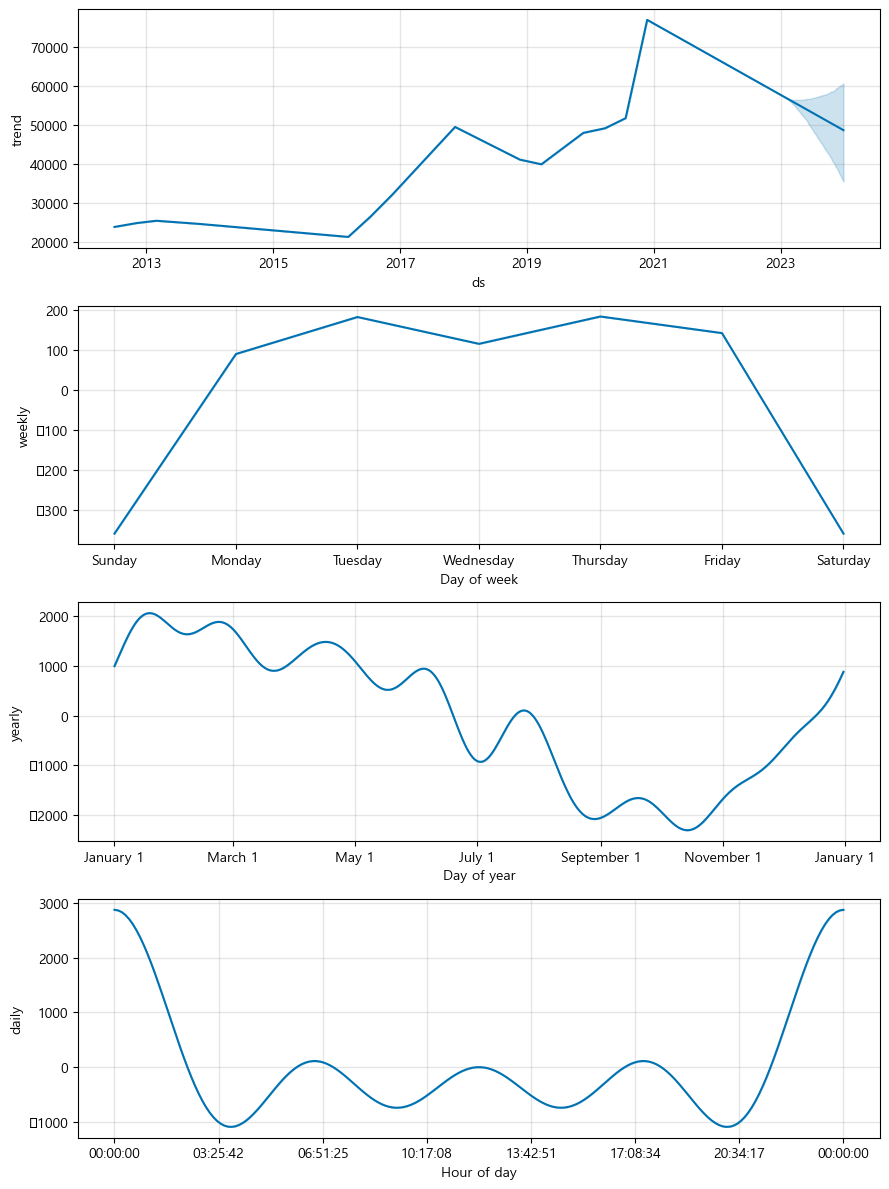

In [26]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

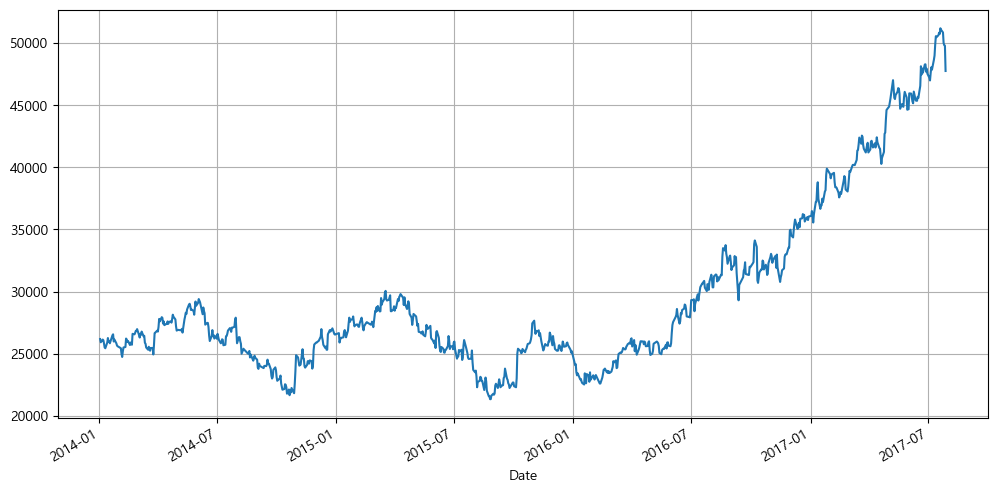

In [27]:
start_date = '2014-1-1'
end_date = '2017-7-31'
SAMSUNG = yf.download('005930.KS',start_date, end_date)   #삼성전자
SAMSUNG['Close'].plot(figsize = (12,6), grid = True)

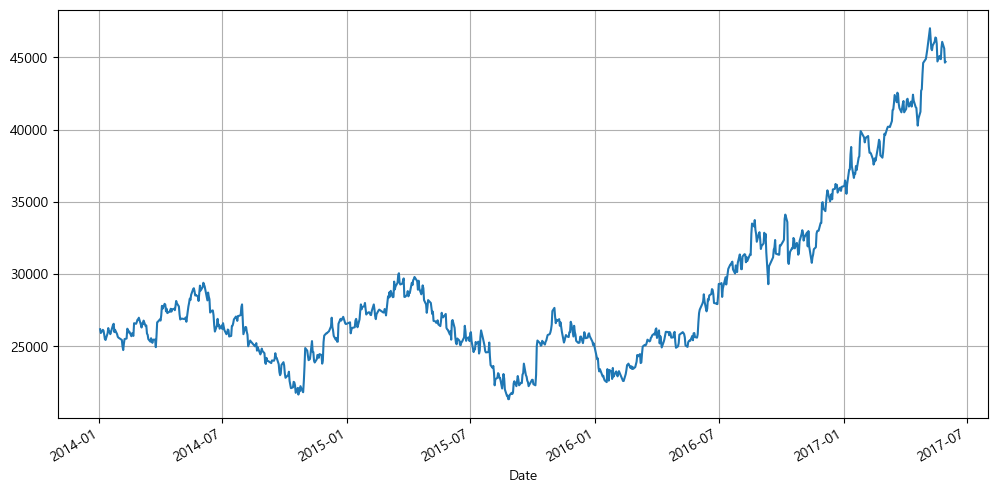

In [29]:
# 일부데이터를 잘라서 forecast를 수행 => '2014-1-1' ~'2022-6-30'
SAM_trunc = SAMSUNG[:'2017-05-31'] 
SAM_trunc['Close'].plot(figsize = (12,6), grid = True );

In [30]:
df = pd.DataFrame({'ds': SAM_trunc.index, 'y': SAM_trunc['Close']})
df.reset_index(inplace = True)
del df['Date']

In [32]:
m = Prophet(daily_seasonality = True)
m.fit(df);

12:19:04 - cmdstanpy - INFO - Chain [1] start processing
12:19:04 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = m.make_future_dataframe(periods = 61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


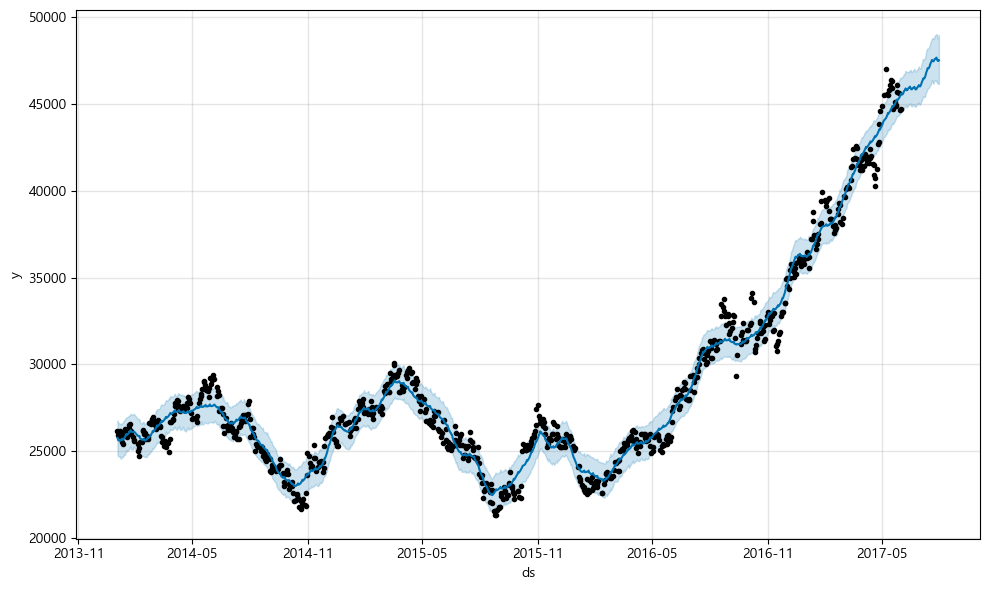

In [34]:
forecast = m.predict(future)
m.plot(forecast);

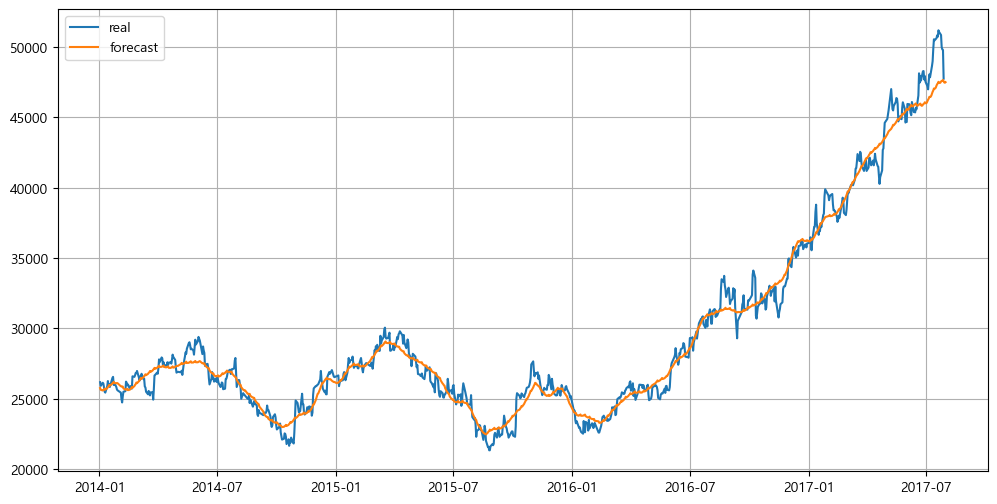

In [37]:
plt.figure(figsize = (12,6))
plt.plot(SAMSUNG.index, SAMSUNG['Close'], label = 'real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

# Growth Model 
* 주기성을 띄면서 점점 성장하는 모델

In [38]:
df = pd.read_csv('../data/python_data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])    #로그 변환
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [39]:
#예측 값의 최대 상한값과 하한값을 제어할 수 있다.
df['cap'] = 8.5    #예측 값의 상한값
df['floor'] = 6

In [40]:
#daily_seasonality = True : 주기성이 일단위라고 알려줌
#growth 파라미터를 설정: 로지스틱 함수
m = Prophet(growth = 'logistic', daily_seasonality = True)
m.fit(df)

12:21:36 - cmdstanpy - INFO - Chain [1] start processing
12:21:37 - cmdstanpy - INFO - Chain [1] done processing


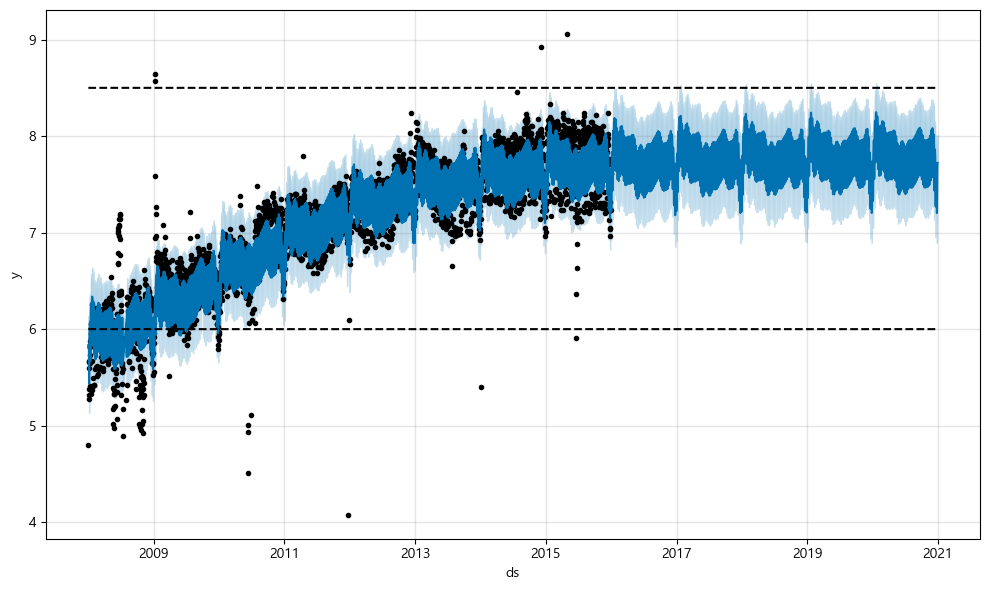

In [41]:
# Prophet은 Linear한 모델을 사용 - 제어하지 않으면 해당  카테고리의 최대 사이즈를 넘을수도 있다. 1826일(5년)
future = m.make_future_dataframe(periods = 1826)
future['cap'] = 8.5  #상한값
future['floor'] = 6
fcst = m.predict(future)
plt = m.plot(fcst)
plt.show()

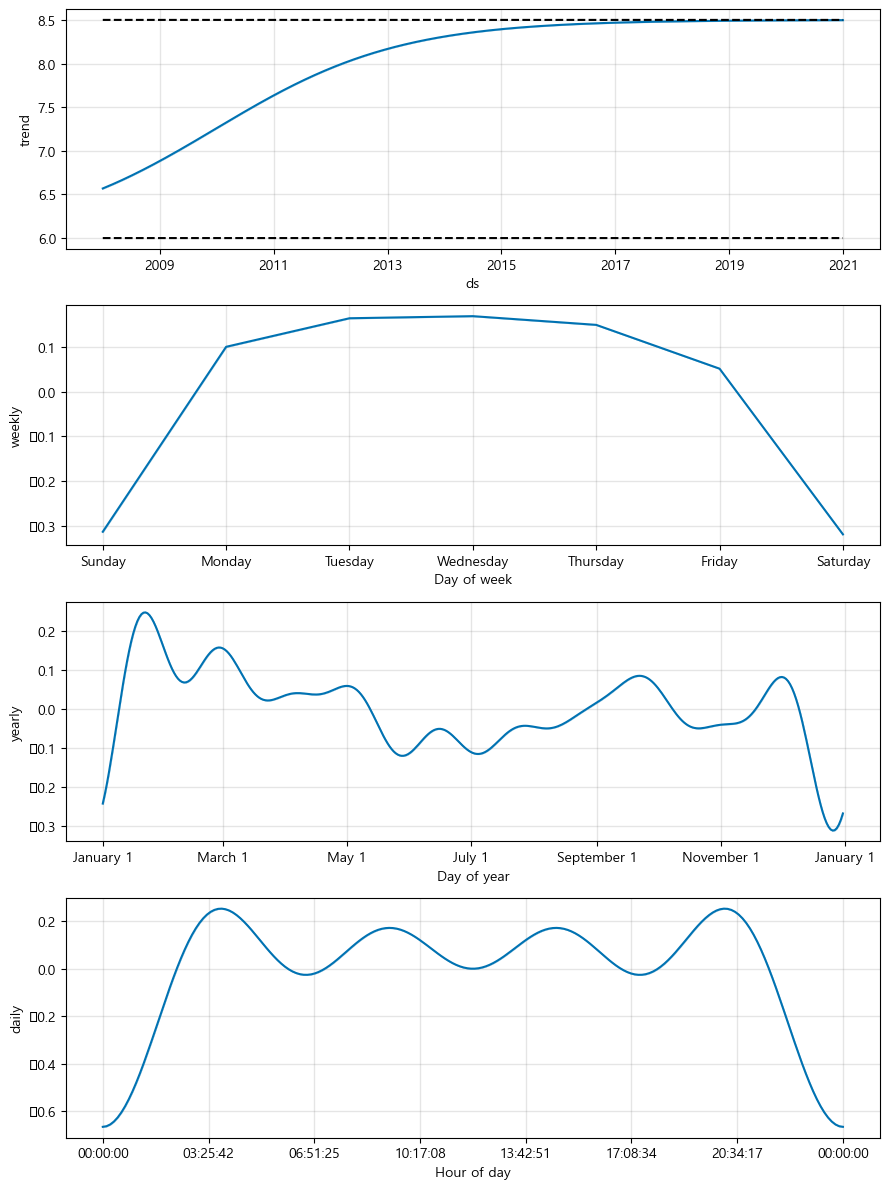

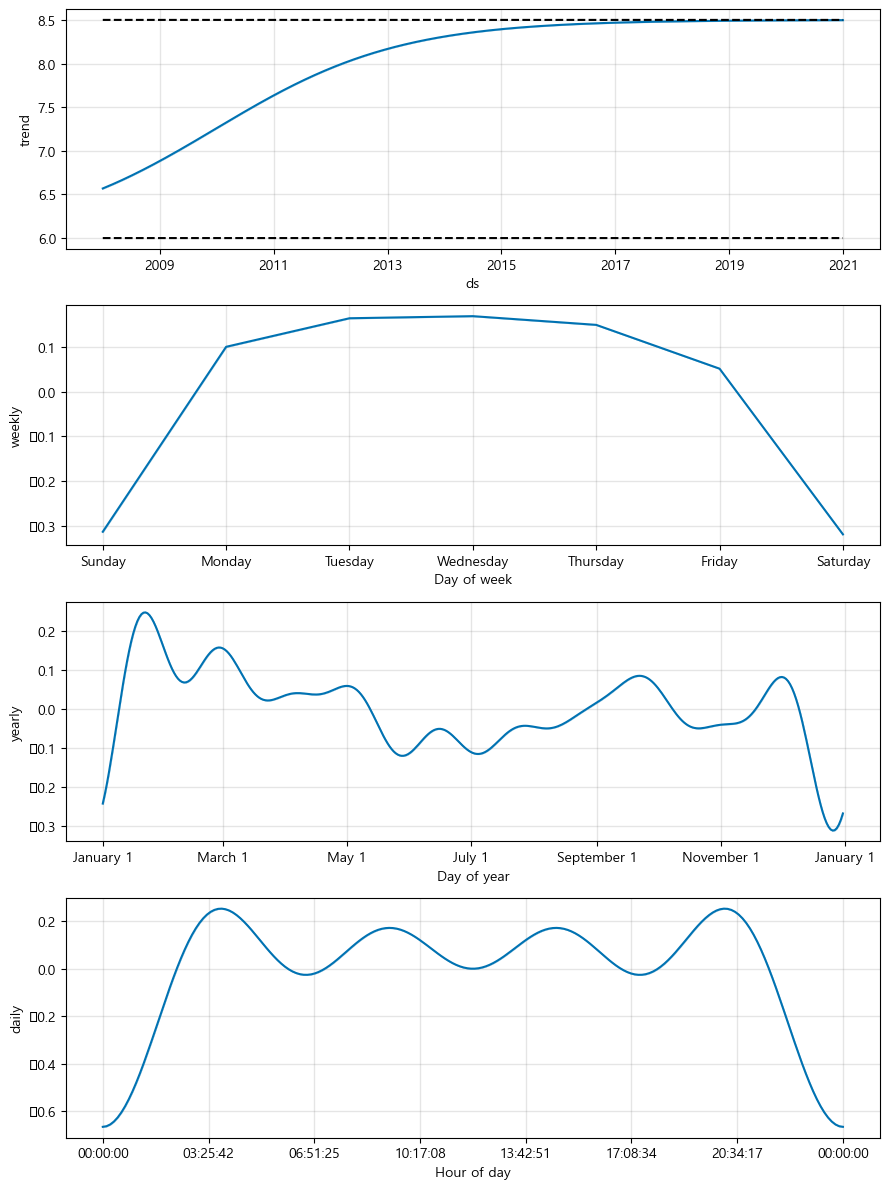

In [42]:
forecast = m.predict(future)
m.plot_components(forecast)

# 연습문제
    1. 관심있는 주식을 분석해 보세요.
    2. 기간 : 10년치
    3. 6개월 후 예측해 보세요.

In [ ]:
NasdaqGS: NVDA

In [81]:
start_date = '2013-1-1'
end_date = '2023-1-31'
NVIDIA = yf.download('NVDA',start_date, end_date)   #엔비디아
NVIDIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,3.1400,3.1825,3.1275,3.1800,2.936479,47883600
2013-01-03,3.1800,3.2175,3.1450,3.1825,2.938787,29888800
2013-01-04,3.1875,3.2975,3.1775,3.2875,3.035747,52496800
2013-01-07,3.2850,3.2950,3.1700,3.1925,2.948021,61073200
2013-01-08,3.2000,3.2100,3.1000,3.1225,2.883382,46642400


<Axes: xlabel='Date'>

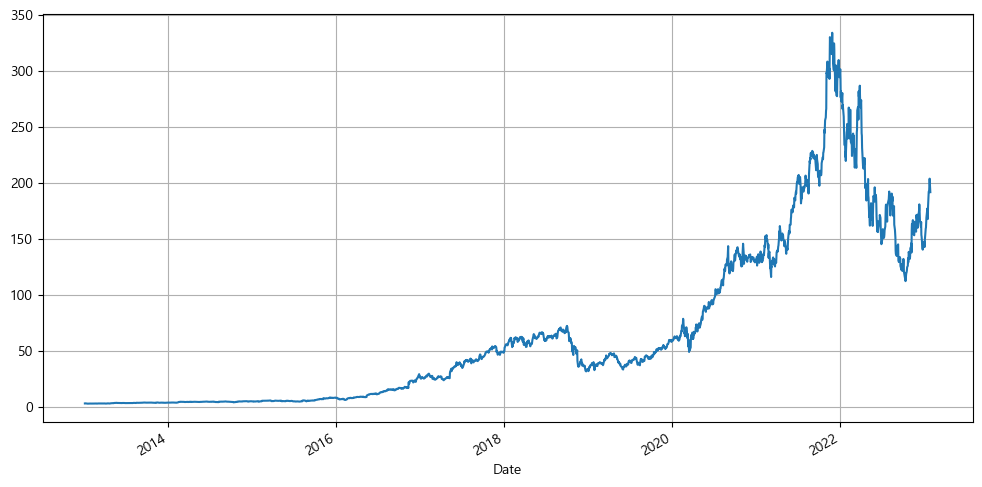

In [82]:
NVIDIA['Close'].plot(figsize = (12,6),grid = True)

In [83]:
df = pd.DataFrame({'ds': NVIDIA.index, 'y': NVIDIA['Close']})
df.reset_index(inplace = True)
del df['Date']
df.head()

,ds,y
0,2013-01-02,3.1800
1,2013-01-03,3.1825
2,2013-01-04,3.2875
3,2013-01-07,3.1925
4,2013-01-08,3.1225


In [84]:
#주기성이 일단위로 있다고 알려줌
m = Prophet(daily_seasonality = True)
m.fit(df)

00:59:02 - cmdstanpy - INFO - Chain [1] start processing
00:59:03 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
# 6개월 후 예측
future = m.make_future_dataframe(periods = 182)
future.tail()

,ds
2714,2023-07-27
2715,2023-07-28
2716,2023-07-29
2717,2023-07-30
2718,2023-07-31


In [86]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
2714,2023-07-27,201.672502,170.632582,233.840678
2715,2023-07-28,201.662712,171.343278,234.899327
2716,2023-07-29,201.891476,170.013837,234.890167
2717,2023-07-30,201.975548,168.898067,233.065375
2718,2023-07-31,202.110541,170.755203,233.665335


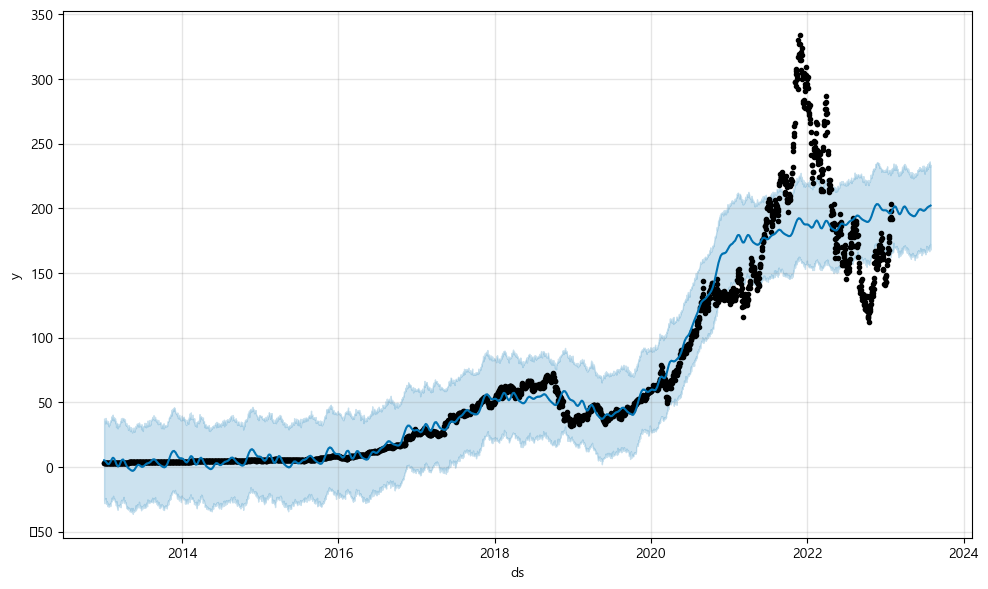

In [87]:
m.plot(forecast);

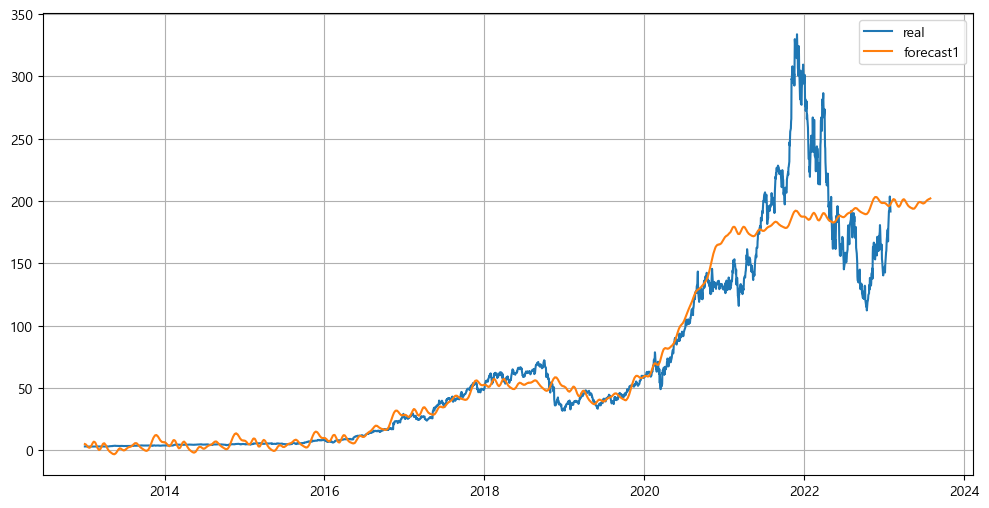

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(NVIDIA.index, NVIDIA['Close'], label = 'real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()